<a href="https://colab.research.google.com/github/ishivamgupta9/CrimeDataAnalysis/blob/main/BaltimoreColumbiaCrimeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
file_id="1RmvxZ-3UXBn9JrhSsF_5rpddzw00CzeL"
file_url = f"https://drive.google.com/uc?id={file_id}"

data = pd.read_csv(file_url)

data

,Unnamed: 0,Date_Reported,Time_Reported,Location,Statistical_Reporting_Area,Beat,Computer_Aided_Dispatch_Event_Type
0,0,07/15/2014,1031,COCA COLA DR ...,253.0,B5,911 HANGUP ...
1,1,10/04/2014,2359,KAISER DR ...,122.0,A2,NOISE COMPLAINT ...
2,2,10/05/2014,54,WASHINGTON BLVD ...,252.0,B5,TRAFFIC STOP ...
3,3,12/17/2014,938,RT 175 EB / RT 95 ...,511.0,E1,MOTOR VEHICLE VIOLATION ...
4,4,06/16/2014,1330,RT 29 SB / RT 32 ...,462.0,D6,VEHICLE FIRE ...
...,...,...,...,...,...,...,...
4995,4995,06/09/2016,1241,MCGAW CT ...,341.0,C4,SUSPICIOUS VEHICLE ...
4996,4996,05/30/2014,2057,STEVENS FOREST RD ...,-1.0,C3,BUSINESS CHECK ...
4997,4997,12/21/2016,1311,ALBION WAY / DANVERS ST ...,253.0,B5,SUSPICIOUS SUBJECT ...
4998,4998,03/02/2016,45,COUNTRY MEADOWS LN / WASHINGTON BLVD ...,523.0,E2,TRAFFIC STOP ...


In [ ]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
data

,Date_Reported,Time_Reported,Location,Statistical_Reporting_Area,Beat,Computer_Aided_Dispatch_Event_Type
0,07/15/2014,1031,COCA COLA DR ...,253.0,B5,911 HANGUP ...
1,10/04/2014,2359,KAISER DR ...,122.0,A2,NOISE COMPLAINT ...
2,10/05/2014,54,WASHINGTON BLVD ...,252.0,B5,TRAFFIC STOP ...
3,12/17/2014,938,RT 175 EB / RT 95 ...,511.0,E1,MOTOR VEHICLE VIOLATION ...
4,06/16/2014,1330,RT 29 SB / RT 32 ...,462.0,D6,VEHICLE FIRE ...
...,...,...,...,...,...,...
4995,06/09/2016,1241,MCGAW CT ...,341.0,C4,SUSPICIOUS VEHICLE ...
4996,05/30/2014,2057,STEVENS FOREST RD ...,-1.0,C3,BUSINESS CHECK ...
4997,12/21/2016,1311,ALBION WAY / DANVERS ST ...,253.0,B5,SUSPICIOUS SUBJECT ...
4998,03/02/2016,45,COUNTRY MEADOWS LN / WASHINGTON BLVD ...,523.0,E2,TRAFFIC STOP ...


In [ ]:
import pandas as pd
import requests

# Your existing DataFrame
df = pd.DataFrame(data).head(2500)
df["Location"] = df["Location"] + " Howard County, MD, USA"

# Define your Google Maps API key and the base URL
API_KEY = ""
BASE_URL = "https://maps.googleapis.com/maps/api/geocode/json"

# Function to geocode a location and extract zip code
def geocode_location(location):
    try:
        # Include the API URL and key in the request
        url = f"{BASE_URL}?address={location}&key={API_KEY}"
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            if data["status"] == "OK":
                location = data["results"][0]["geometry"]["location"]
                latitude = location["lat"]
                longitude = location["lng"]

                # Extract zip code
                for component in data["results"][0]["address_components"]:
                    if "postal_code" in component["types"]:
                        zip_code = component["long_name"]
                        break
                else:
                    zip_code = None

                return latitude, longitude, zip_code
    except Exception as e:
        print(f"Geocoding error: {str(e)}")
    return None, None, None

# Apply geocoding to the "Street" column and extract zip code
df["Latitude"], df["Longitude"], df["Zip Code"] = zip(*df["Location"].apply(geocode_location))

# Display the updated DataFrame
df


,Date_Reported,Time_Reported,Location,Statistical_Reporting_Area,Beat,Computer_Aided_Dispatch_Event_Type,Latitude,Longitude,Zip Code
0,07/15/2014,1031,COCA COLA DR ...,253.0,B5,911 HANGUP ...,39.182748,-76.734204,21076
1,10/04/2014,2359,KAISER DR ...,122.0,A2,NOISE COMPLAINT ...,39.283177,-76.813820,21043
2,10/05/2014,54,WASHINGTON BLVD ...,252.0,B5,TRAFFIC STOP ...,39.184768,-76.762437,None
3,12/17/2014,938,RT 175 EB / RT 95 ...,511.0,E1,MOTOR VEHICLE VIOLATION ...,38.870107,-76.843784,None
4,06/16/2014,1330,RT 29 SB / RT 32 ...,462.0,D6,VEHICLE FIRE ...,39.284043,-76.966540,None
...,...,...,...,...,...,...,...,...,...
2495,07/26/2014,1033,CLARKSVILLE PK ...,411.0,D1,TRAFFIC STOP ...,39.216875,-76.932111,None
2496,12/17/2014,1652,COURT HOUSE DR ...,141.0,A4,EMERGENCY PETITION ...,39.273604,-76.802189,21043
2497,02/07/2014,729,WIMBLEDON CT ...,231.0,B3,ABANDONED VEHICLE ...,39.196468,-76.779081,21075
2498,07/29/2014,1938,HARPERS FARM RD / TWIN RIVERS RD ...,422.0,D2,PROP DAMAGE - 104 ...,39.219126,-76.880310,21044


In [ ]:
df.isna().any()

Date_Reported                         False
Time_Reported                         False
Location                              False
Statistical_Reporting_Area             True
Beat                                  False
Computer_Aided_Dispatch_Event_Type    False
Latitude                              False
Longitude                             False
Zip Code                               True
dtype: bool

In [ ]:
df["Zip Code"].isna().sum()

895

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Date_Reported,Time_Reported,Location,Statistical_Reporting_Area,Beat,Computer_Aided_Dispatch_Event_Type,Latitude,Longitude,Zip Code
0,07/15/2014,1031,COCA COLA DR ...,253.0,B5,911 HANGUP ...,39.182748,-76.734204,21076
1,10/04/2014,2359,KAISER DR ...,122.0,A2,NOISE COMPLAINT ...,39.283177,-76.813820,21043
6,10/26/2014,2137,HARPERS FARM RD ...,422.0,D2,PROP DAMAGE - 104 ...,39.224301,-76.893350,21044
8,01/13/2016,1100,COURT HOUSE DR ...,141.0,A4,SEX OFFENDER REGISTRATION ...,39.273604,-76.802189,21043
9,01/13/2016,1100,COURT HOUSE DR ...,141.0,A4,SEX OFFENDER REGISTRATION ...,39.273604,-76.802189,21043
...,...,...,...,...,...,...,...,...,...
2492,08/10/2016,1938,GATEWAY OVERLOOK DR ...,231.0,B3,LOCKED IN VEHICLE ...,39.184435,-76.795261,21075
2494,11/05/2014,706,AMBERTON DR ...,253.0,B5,911 HANGUP ...,39.188383,-76.750200,21075
2496,12/17/2014,1652,COURT HOUSE DR ...,141.0,A4,EMERGENCY PETITION ...,39.273604,-76.802189,21043
2497,02/07/2014,729,WIMBLEDON CT ...,231.0,B3,ABANDONED VEHICLE ...,39.196468,-76.779081,21075


In [ ]:
df.to_csv("CrimeDatawithGeoZip1600.csv")

In [ ]:
import numpy as np
import pandas as pd
file_id="1FNNBMDaBoonFbxO29WpZYtm5thAOU-7b"
file_url = f"https://drive.google.com/uc?id={file_id}"

cdata = pd.read_csv(file_url)

cdata.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
cdata

,Date_Reported,Time_Reported,Location,Statistical_Reporting_Area,Beat,Computer_Aided_Dispatch_Event_Type,Latitude,Longitude,Zip Code
0,07/15/2014,1031,COCA COLA DR ...,253.0,B5,911 HANGUP ...,39.182748,-76.734204,21076
1,10/04/2014,2359,KAISER DR ...,122.0,A2,NOISE COMPLAINT ...,39.283177,-76.813820,21043
2,10/26/2014,2137,HARPERS FARM RD ...,422.0,D2,PROP DAMAGE - 104 ...,39.224301,-76.893350,21044
3,01/13/2016,1100,COURT HOUSE DR ...,141.0,A4,SEX OFFENDER REGISTRATION ...,39.273604,-76.802189,21043
4,01/13/2016,1100,COURT HOUSE DR ...,141.0,A4,SEX OFFENDER REGISTRATION ...,39.273604,-76.802189,21043
...,...,...,...,...,...,...,...,...,...
1600,08/10/2016,1938,GATEWAY OVERLOOK DR ...,231.0,B3,LOCKED IN VEHICLE ...,39.184435,-76.795261,21075
1601,11/05/2014,706,AMBERTON DR ...,253.0,B5,911 HANGUP ...,39.188383,-76.750200,21075
1602,12/17/2014,1652,COURT HOUSE DR ...,141.0,A4,EMERGENCY PETITION ...,39.273604,-76.802189,21043
1603,02/07/2014,729,WIMBLEDON CT ...,231.0,B3,ABANDONED VEHICLE ...,39.196468,-76.779081,21075


In [ ]:

cdata.isna().any()

Date_Reported                         False
Time_Reported                         False
Location                              False
Statistical_Reporting_Area            False
Beat                                  False
Computer_Aided_Dispatch_Event_Type    False
Latitude                              False
Longitude                             False
Zip Code                              False
dtype: bool

In [ ]:
cdata["Date_Reported"]=pd.to_datetime(cdata["Date_Reported"])
cdata["Month"]=cdata["Date_Reported"].dt.strftime('%B')
cdata

,Date_Reported,Time_Reported,Location,Statistical_Reporting_Area,Beat,Computer_Aided_Dispatch_Event_Type,Latitude,Longitude,Zip Code,Month
0,2014-07-15,1031,COCA COLA DR ...,253.0,B5,911 HANGUP ...,39.182748,-76.734204,21076,July
1,2014-10-04,2359,KAISER DR ...,122.0,A2,NOISE COMPLAINT ...,39.283177,-76.813820,21043,October
2,2014-10-26,2137,HARPERS FARM RD ...,422.0,D2,PROP DAMAGE - 104 ...,39.224301,-76.893350,21044,October
3,2016-01-13,1100,COURT HOUSE DR ...,141.0,A4,SEX OFFENDER REGISTRATION ...,39.273604,-76.802189,21043,January
4,2016-01-13,1100,COURT HOUSE DR ...,141.0,A4,SEX OFFENDER REGISTRATION ...,39.273604,-76.802189,21043,January
...,...,...,...,...,...,...,...,...,...,...
1600,2016-08-10,1938,GATEWAY OVERLOOK DR ...,231.0,B3,LOCKED IN VEHICLE ...,39.184435,-76.795261,21075,August
1601,2014-11-05,706,AMBERTON DR ...,253.0,B5,911 HANGUP ...,39.188383,-76.750200,21075,November
1602,2014-12-17,1652,COURT HOUSE DR ...,141.0,A4,EMERGENCY PETITION ...,39.273604,-76.802189,21043,December
1603,2014-02-07,729,WIMBLEDON CT ...,231.0,B3,ABANDONED VEHICLE ...,39.196468,-76.779081,21075,February


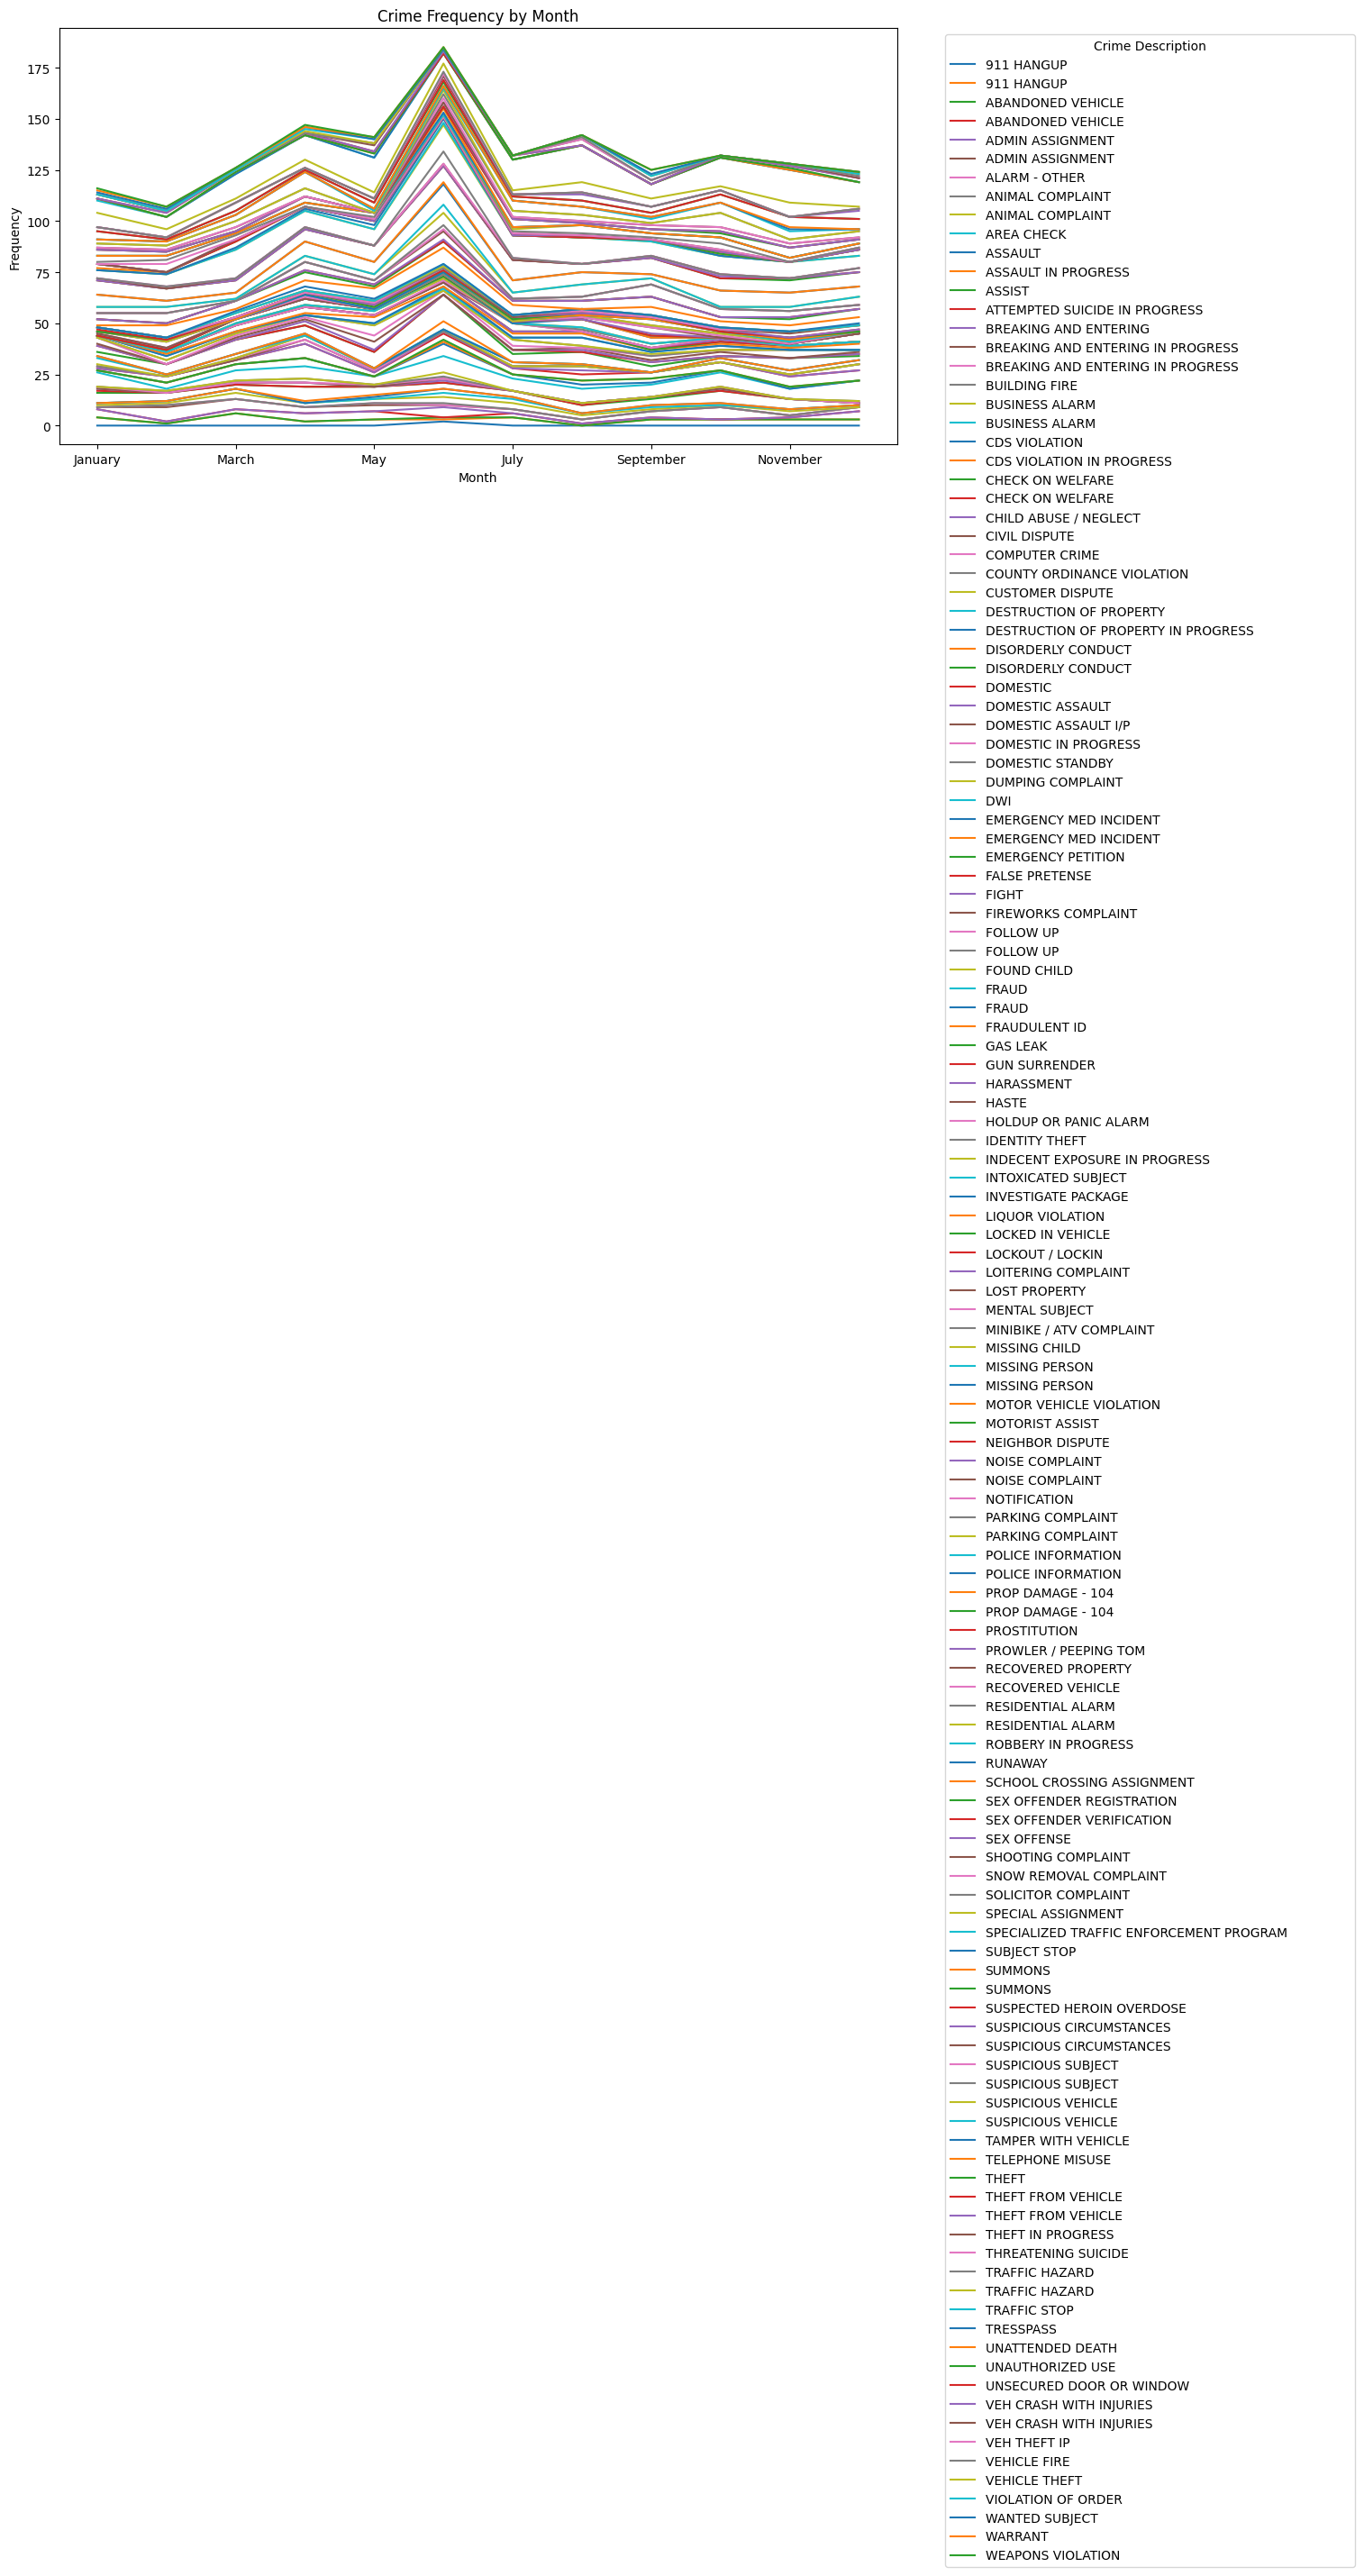

In [ ]:
import matplotlib.pyplot as plt
import calendar

crime_by_month=cdata.groupby(["Month","Computer_Aided_Dispatch_Event_Type"]).size().unstack(fill_value=0)


month_order = [calendar.month_name[i] for i in range(1, 13)]  # Create a list of month names
crime_by_month = crime_by_month.reindex(month_order, axis=0)

crime_by_month.plot(kind='line', stacked=True, figsize=(12, 6))
plt.title('Crime Frequency by Month')
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.legend(title="Crime Description", bbox_to_anchor=(1.05,1),loc='best')
plt.show()


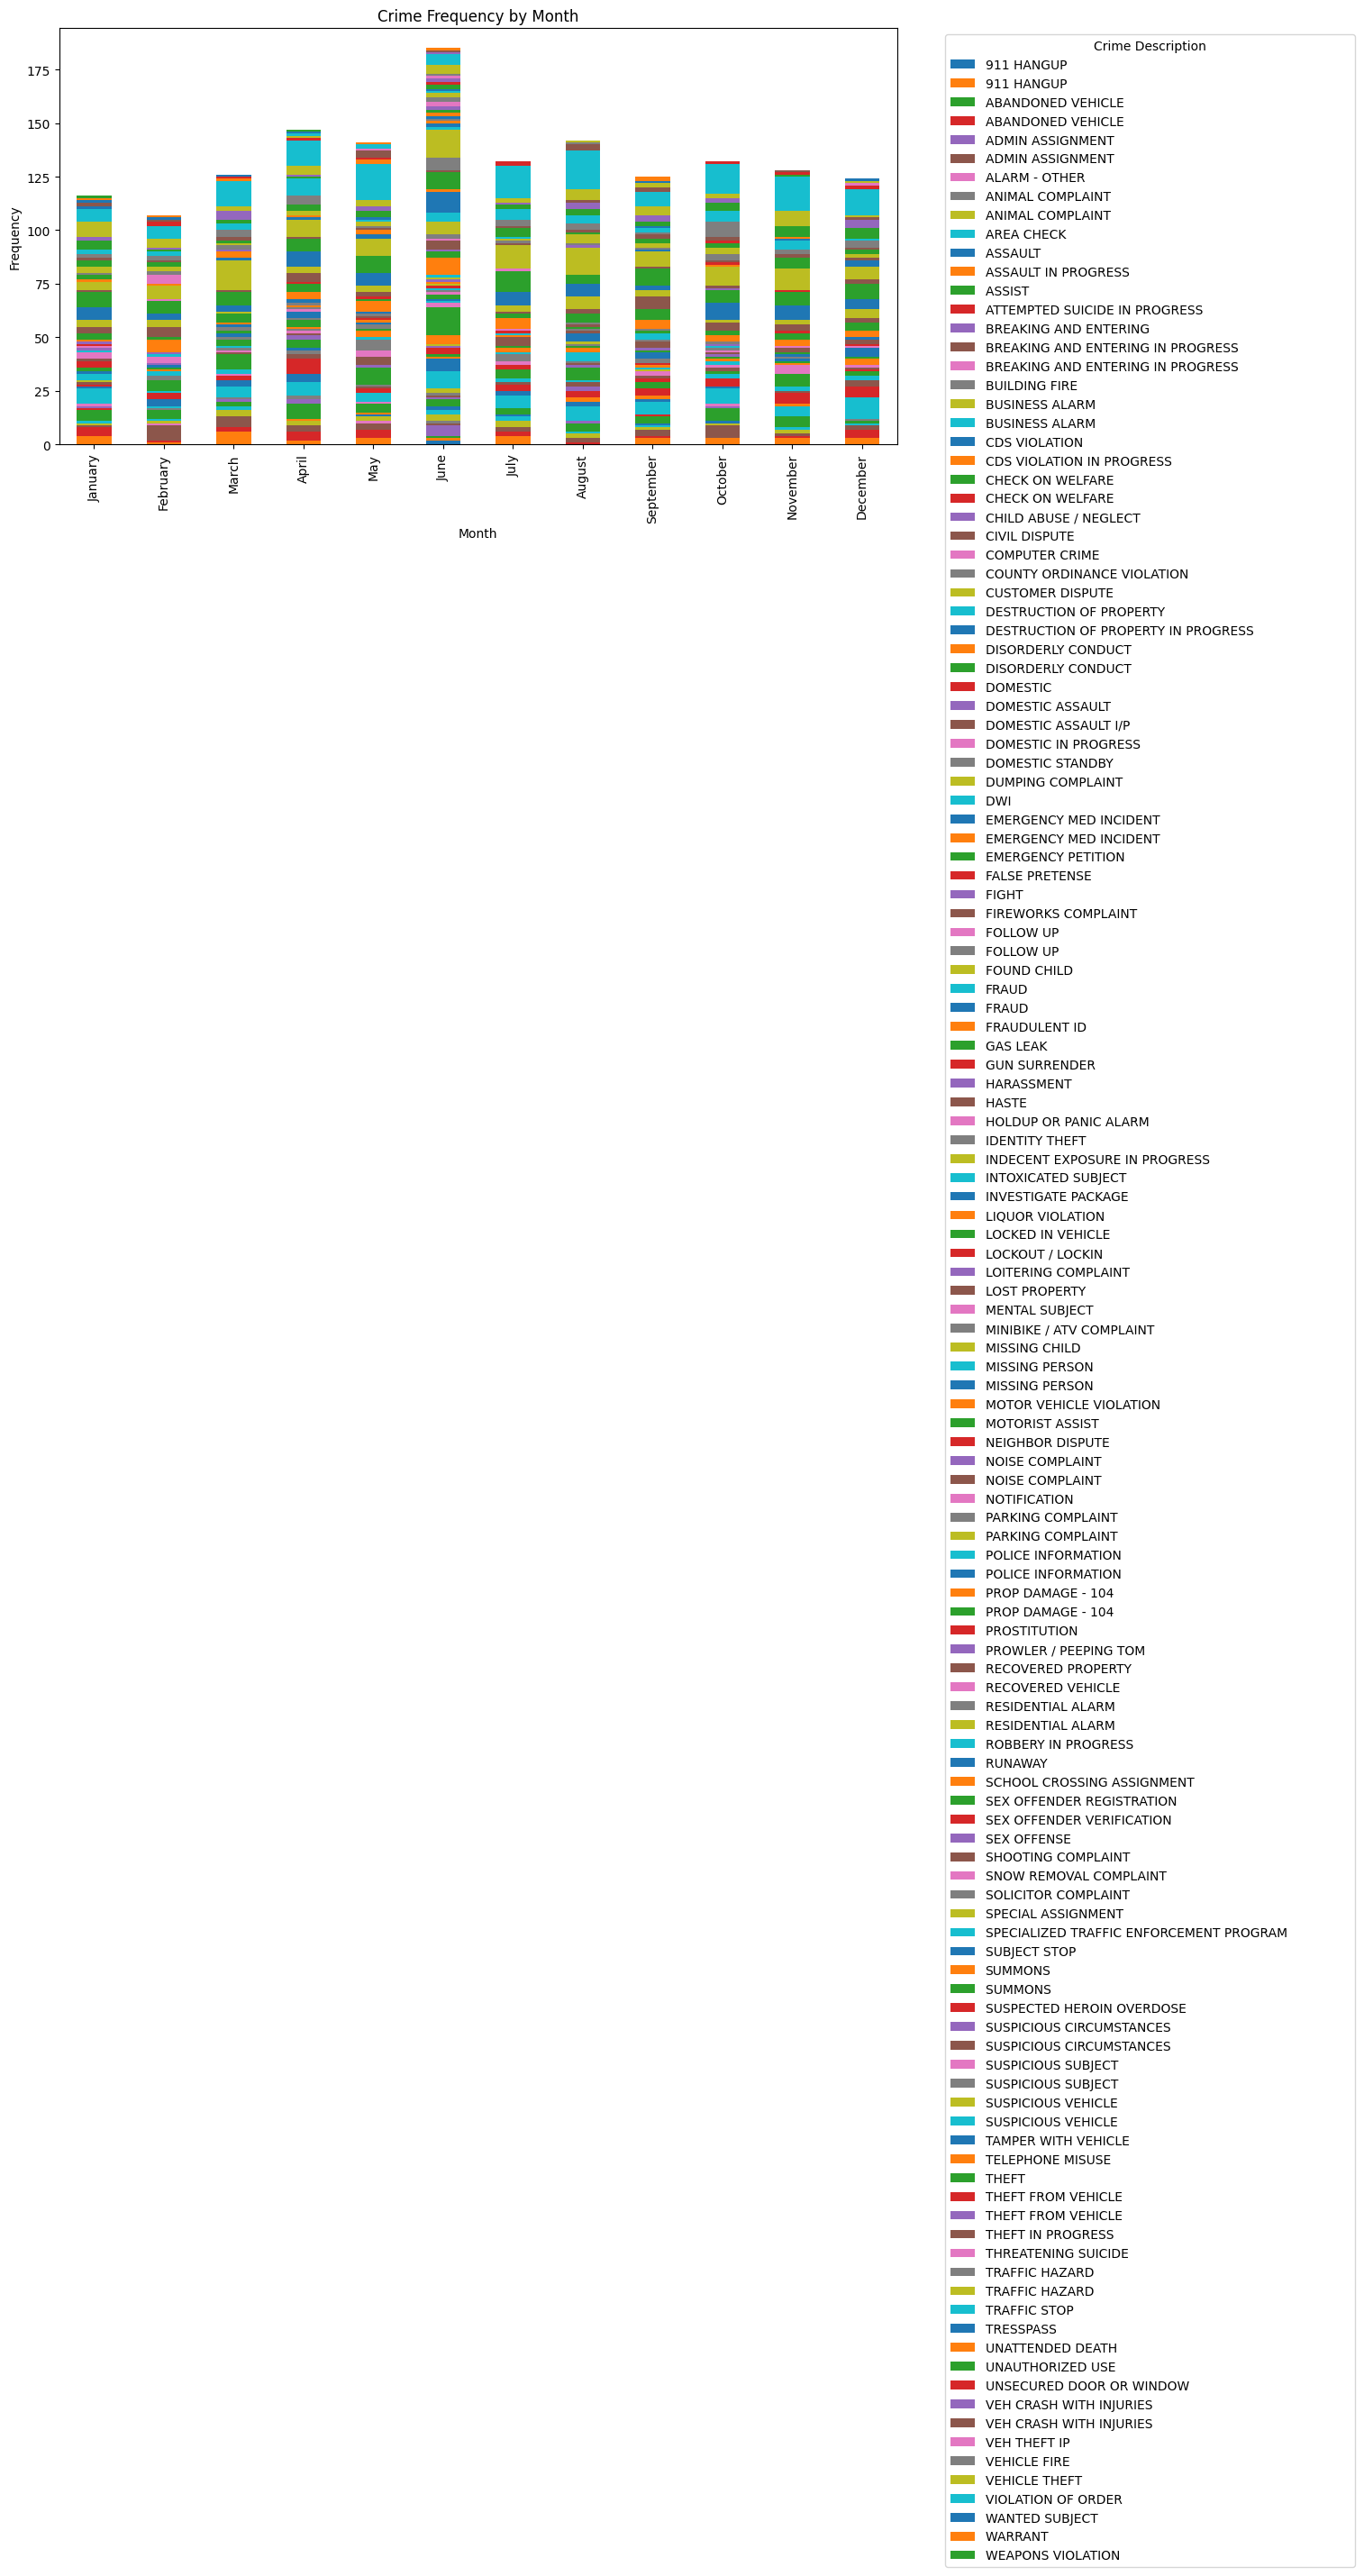

In [ ]:
import matplotlib.pyplot as plt
import calendar

crime_by_month=cdata.groupby(["Month","Computer_Aided_Dispatch_Event_Type"]).size().unstack(fill_value=0)


month_order = [calendar.month_name[i] for i in range(1, 13)]  # Create a list of month names
crime_by_month = crime_by_month.reindex(month_order, axis=0)

crime_by_month.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Crime Frequency by Month')
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.legend(title="Crime Description", bbox_to_anchor=(1.05,1),loc='best')
plt.show()